# 데이터 품질과 데이터에 담긴 유용한 정보의 양
>* 머신 러닝 알고리즘을 얼마나 잘 학습할 수 있는지 결정하는 중요한 요소.
>* 학습 알고리즘에 데이터를 주입하기 전에 조사하고 전처리하는 것이 매우 중요
    * 데이터셋에서 누락된 값을 제거하거나 대체하기
    * 머신 러닝 알고리즘을 위해 범주형 데이터 변환하기
    * 모델과 관련이 높은 특성 선택하기

---
## 누락된 데이터 다루기
---
> 1) 여러가지 이유로 훈련 샘플에 하나 이상의 값이 누락 발생

> 2) 숫자가 아니라는 의미(NaN: not a number) / 데이터베이스 모르는 값(NULL)

> 3) 수치 계산 라이브러리 혹은 패키지 누락된 값을 다룰수 없거나 단순히 이를 무시했을 때 예상치 못한 결과값 도출.

> 4) 분석을 진행하기 전 누락된 값을 처리하는 것이 중요

---
### 테이블 형태 데이터에서 누락된 값 식별

In [12]:
import pandas as pd
# StringIO: 하드 디스크에 있는 일반 CSV파일처럼 csv_data에 저장된 문자열을 읽어 판다스 변환 가능.
from io import StringIO

csv_data =\
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
'''
df = pd.read_csv(StringIO(csv_data))
print(df)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


---
아주 큰 DataFrame일 경우, 수동으로 누락된 값을 찾는 것은 매우 번거롭다.

> 1) isnull 함수 사용해서 찾는 것이 가능.

In [10]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

---
### 누락된 값이 있는 훈련 샘플이나 특성제외
> 1) 누락된 값이 있는 행 삭제: dropna(axis=0)

In [11]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


---
>2) 누락된 값이 있는 열 삭제: dropna(axis=1)

In [13]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


---
> 3) 모든 열이 NaN일 경우 행 삭제: dropna(how='all')

In [14]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


---
> 4) 특정 열에 NaN이 있는 행만 삭제: dropna(subset=['C'])

In [15]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


---
> 5) NaN이 아닌 값이 4개보다 작은 행 삭제: dropna(thresh=4)

In [17]:
df.dropna(thresh=3)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


---
### 누락된 값 대체
---
> 1) 샘플 데이터 삭제 혹은 특성열을 통째로 제거 어려움 --> 유용한 데이터 너무 많이 잃기 때문에

> 2) 다른 훈련 데이터로부터 누락된 값을 추정 가능
>> a) 평균으로 대체(열 데이터를 기반): 사이킷런 SimpleImputer
>>> * fit: 훈련데이터에서 모델 파라미터 학습
>>> * transform: 학습한 파라미터로 데이터 변환(변환하려는 데이터 배열은 모델 학습에 사용한 데이터의 특성 개수와 같아야 한다.)

In [20]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(df)
print()
print(imputed_data)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN

[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


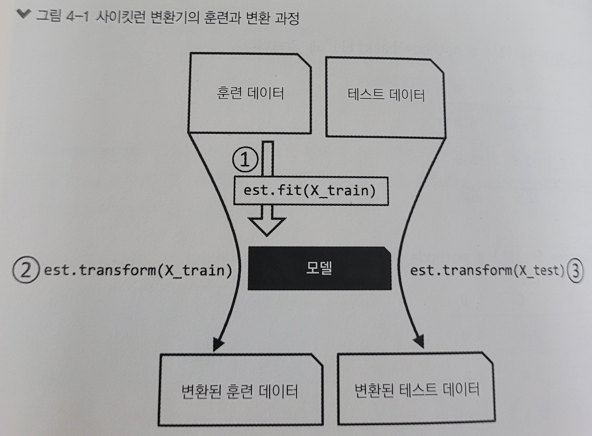

---
>> b) 판다스의 fillna 메서드 이용: fillna(df.mean())

In [22]:
print(df)
print()
df.fillna(df.mean())

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN



,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


---
>> c) 다음 행에 있는 데이터 값 채우기

In [23]:
df.fillna(method='bfill')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


---
>> d) 이전 행에 있는 데이터 값 채우기
        >>* axis = 1로 지정하면, 열이 아니라 행을 사용

In [27]:
a = df.fillna(method='ffill')
b = df.fillna(method='ffill', axis=1)
print(a)
print()
print(b)

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   3.0  8.0
2  10.0  11.0  12.0  8.0

      A     B     C     D
0   1.0   2.0   3.0   4.0
1   5.0   6.0   6.0   8.0
2  10.0  11.0  12.0  12.0
